develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [227]:
m = 20
X = np.linspace(0,20,20).reshape(m,1)
y = -2*X + 1
y = y.reshape(m,1)
"""
X = np.linspace(0, 10, 100).reshape(100,1)
y = 3 + 1 * x  + np.random.normal(0, 1, size=100).reshape(100,1)
"""

'\nX = np.linspace(0, 10, 100).reshape(100,1)\ny = 3 + 1 * x  + np.random.normal(0, 1, size=100).reshape(100,1)\n'

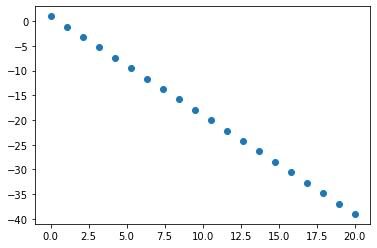

In [228]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

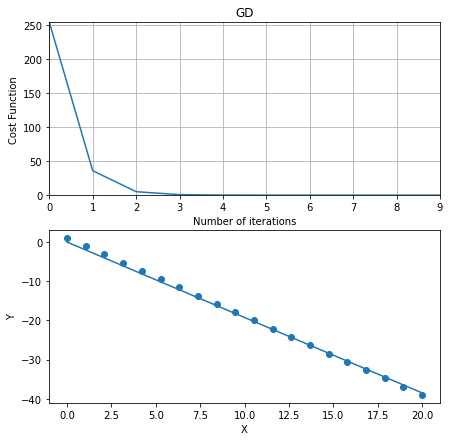

In [229]:
alpha = 0.01
def LR_single_variable(X,y,alpha,iterations):
    X = np.array(X).reshape(len(X),1)
    y = np.array(y).reshape(len(y),1)
    m = len(X)
    n = 2
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    theta_0 = 0
    theta_1 = 0
    thetas = np.array([theta_0,theta_1]).reshape(1,n)
    cost = np.zeros(iterations)
    theta0 = []
    theta1 = []
    for i in range(iterations):
        
        h = x_c@thetas.T
        grad = (alpha * ((h-y).T)@x_c) * (1/m)
        thetas = thetas - grad
        J = (h-y).T@(h-y) * (1/(2*m))
        theta0.append(thetas[0,0])
        theta1.append(thetas[0,1])
        cost[i] = J
        if np.linalg.norm(thetas)<0.01:
            break
        elif (i>1):
            if np.linalg.norm(cost[i]-cost[i-1])<0.001:
                break
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    cost = cost[:i+1]
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,i,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(X,y)
    plt.plot(X,h)
    #plt.axis('off')
    
    return thetas,cost,h,theta0,theta1
thetas,cost,h,theta0,theta1 = LR_single_variable(X,y,alpha,20)

#### Try your function with any input parameterss of your choice.

In [230]:
x_p = np.array([1,2]).reshape(1,2)
y_pred = x_p@thetas.T
y_pred

array([[-3.9473602]])

In [231]:
m = len(X)
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 

#### Calculate r2 score

In [232]:
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.9977483867158106

#### Plot loss vs. epochs

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

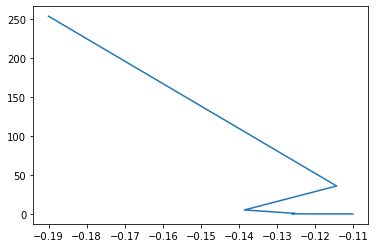

In [233]:
plt.plot(theta0,cost)

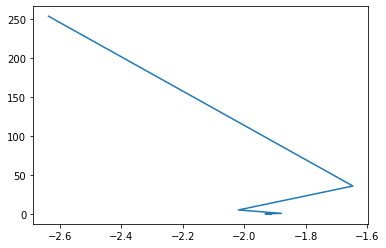

In [234]:
plt.plot(theta1,cost)

#### Plot all regression lines till converge

In [235]:
theta1 = np.array(theta1).reshape(1,len(theta1))
x1 = X@theta1
theta0 = np.array(theta0).reshape(1,len(theta0))
x0 = X@theta0

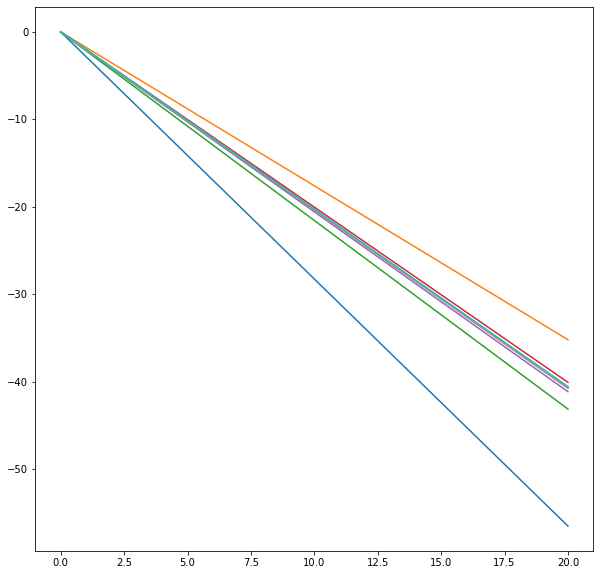

In [236]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

#### Plot the best regression line

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [237]:
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.9977483867158106

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

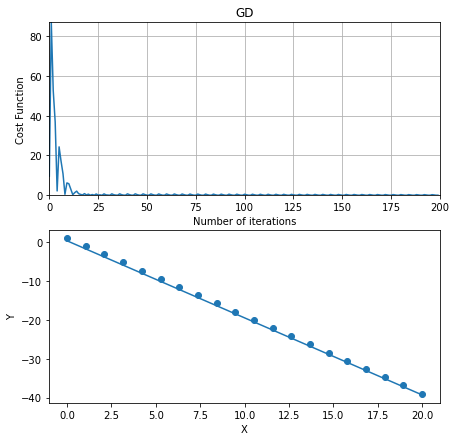

In [238]:
alpha = 0.01

def LR_Mini_Batch_single_variable(X,y,alpha,iterations):
    m = len(X)
    n = 2
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    theta_0 = 0
    theta_1 = 0
    thetas = np.array([theta_0,theta_1]).reshape(1,n)
    theta0 = []
    theta1 = []
    factor = 4
    batch_size = np.ceil(len(X)/factor)
    batch_size = int(batch_size)
    cost = []
    c = 0
    for i in range(iterations):
        for j in range(factor):
            
            c = c+1
            x = x_c[j*batch_size:j*batch_size+batch_size,:]
            Y = y[j*batch_size:j*batch_size+batch_size]
            h = x@thetas.T
            grad = (alpha * ((h-Y).T)@x) * (1/batch_size)
            thetas = thetas - grad
            J = (h-Y).T@(h-Y) * (1/(2*batch_size))
            cost.append(J)
        theta0.append(thetas[0,0])
        theta1.append(thetas[0,1])
        if np.linalg.norm(thetas)<0.01:
            break
        elif np.linalg.norm(cost[c-1]-cost[c-2])<0.001:
            break

    cost = np.array(cost).reshape(c)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,c,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    h = x_c@thetas.T
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(X,y)
    plt.plot(X,h)
    #plt.axis('off')
    
    return thetas,cost,h,theta0,theta1
thetas,cost,h,theta0,theta1 = LR_Mini_Batch_single_variable(X,y,alpha,50)

In [239]:
theta1 = np.array(theta1).reshape(1,len(theta1))
x1 = X@theta1
theta0 = np.array(theta0).reshape(1,len(theta0))
x0 = X@theta0

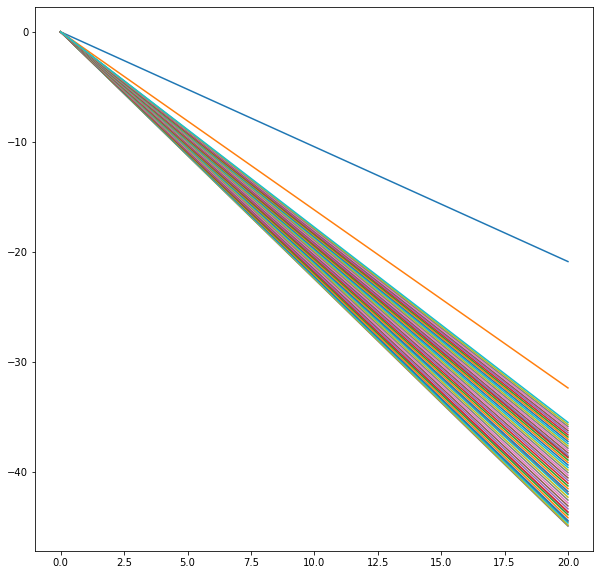

In [240]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

In [241]:
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)

0.9977161251763708

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

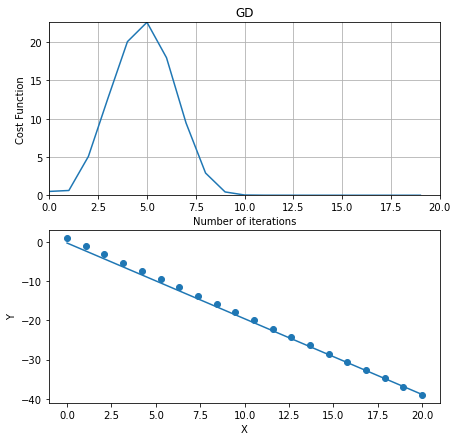

In [217]:
alpha = 0.01

def LR_Stochastic_single_variable(X,y,alpha,iterations):
    m = len(X)
    n = 2
    x_c = np.ones(m).reshape(m,1)
    x_c = np.concatenate([x_c,X],axis=1) 
    theta_0 = 0
    theta_1 = 0
    thetas = np.array([theta_0,theta_1]).reshape(1,n)
    theta0 = []
    theta1 = []
    cost = []
    c = 0
    for i in range(iterations):
        for j in range(len(X)):
            c = c+1
            x = x_c[j,:]
            Y = y[j]
            h = x@thetas.T
            grad = (alpha * ((h-Y).T)*x) 
            thetas = thetas - grad
            J = (h-Y).T@(h-Y) * (1/2)
            cost.append(J)
            
        theta0.append(thetas[0,0])
        theta1.append(thetas[0,1])
        if np.linalg.norm(thetas)<0.01:
            break
        elif np.linalg.norm(cost[c-1]-cost[c-2])<0.001:
            break

    cost = np.array(cost).reshape(c)
    fig = plt.figure(figsize=(7, 7))
    rows = 2
    columns = 1
    
    fig.add_subplot(rows, columns, 1)
    plt.ylabel("Cost Function")
    plt.xlabel("Number of iterations")
    plt.axis([0,c,0,cost.max()])
    plt.grid()
    plt.plot(cost)
    #plt.axis('off')
    plt.title("GD")
    
    h = x_c@thetas.T
    fig.add_subplot(rows, columns, 2)
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.scatter(X,y)
    plt.plot(X,h)
    #plt.axis('off')
    
    return thetas,cost,h,theta0,theta1

thetas,cost,h,theta0,theta1 = LR_Stochastic_single_variable(X,y,alpha,50)

In [218]:
theta1 = np.array(theta1).reshape(1,len(theta1))
x1 = X@theta1
theta0 = np.array(theta0).reshape(1,len(theta0))
x0 = X@theta0

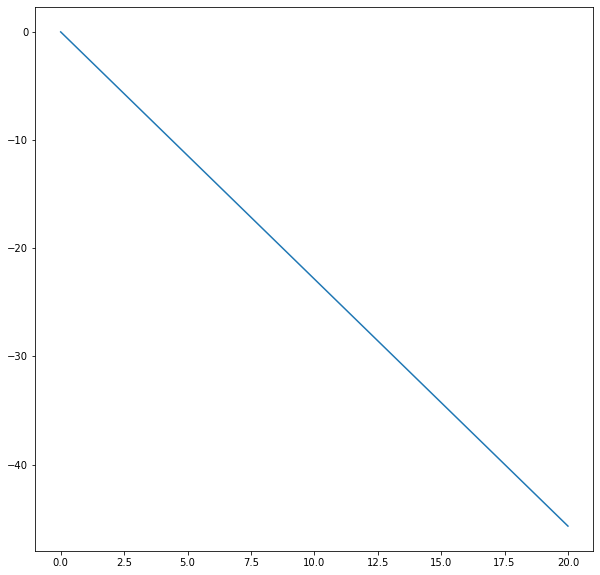

In [219]:
out = x0+x1
plt.figure(figsize=(10,10))
plt.plot(X,out)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
m = X.shape[0]
x_c = np.ones(m).reshape(m,1)
x_c = np.concatenate([x_c,X],axis=1) 
y_pred_GD = x_c@thetas.T
r2_score(y,y_pred_GD)